In [1]:
cd ..

/home/abhishekabhishek/git/AQT-KimGroup


In [2]:
from qiskit import IBMQ, QuantumCircuit
from qiskit.quantum_info import state_fidelity
from qiskit.exceptions import QiskitError
import numpy as np
import matplotlib.pyplot as plt
from fidelity import plotDM

%matplotlib inline

System setup

In [117]:
# System setup
n_qubits = 6
n_shots = 100
povm = 'pauli6'
n_meas = (3**n_qubits)*n_shots if povm == 'pauli6' else 0

# Choose which type of state to prepare
# One of ghz, w, bisep, random
state = 'ghz'
hardware = ''

# Training setup
n_epochs = 200
n_layers = 2
d_model = 128
n_heads = 4

# setup directories
data_dir = 'data'
state_dir = data_dir + f'/{state}_{n_qubits}{hardware}'

dm_info = f'{n_qubits}_{n_meas}_'
dm_types = ['ideal', 'linear', 'linear_mle', 'gaussian_mle']

ideal_dm, linear_dm, linear_mle_dm, gaussian_mle_dm = (np.load(f'{state_dir}/{dm_info}{dm_type}_dm.npy') for dm_type in dm_types)

In [118]:
data_path = f'{state_dir}/{n_qubits}_{n_meas}'
model_pre_dm_path = f'{data_path}_{n_epochs}-{n_layers}-{d_model}-{n_heads}_pre_dm.npy'
model_post_dm_path = f'{data_path}_{n_epochs}-{n_layers}-{d_model}-{n_heads}_post_dm.npy'

#model_pre_dm_path = 'old_data/ghz_6/6_72900_200-2-128-4_dm.npy'

print(model_pre_dm_path, model_post_dm_path)
model_pre_dm = np.load(model_pre_dm_path)
model_post_dm = np.load(model_post_dm_path)

data/ghz_6/6_72900_200-2-128-4_pre_dm.npy data/ghz_6/6_72900_200-2-128-4_post_dm.npy


ideal : Quantum fidelity = 1.0000000000000084
linear : Quantum fidelity = 0.9194626932132558
linear_mle : Quantum fidelity = 0.9915824930724328
gaussian_mle : Quantum fidelity = 0.9989944295050871
model_pre : Quantum fidelity = 0.5015094851725579
model_post : Quantum fidelity = 0.4993798832432535


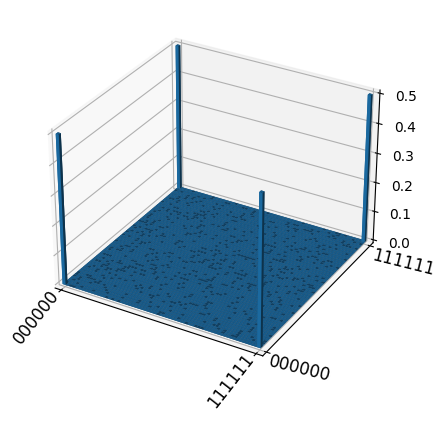

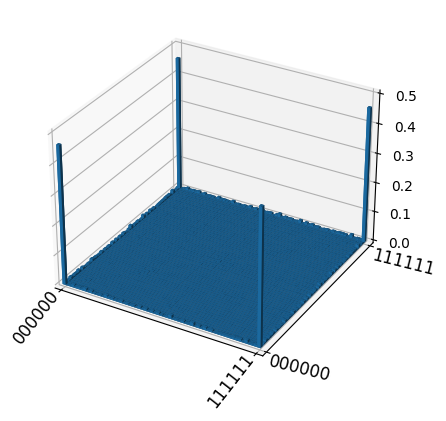

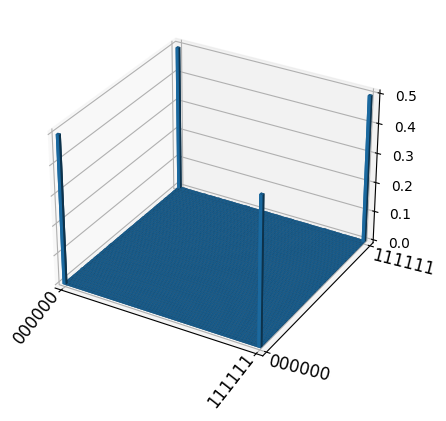

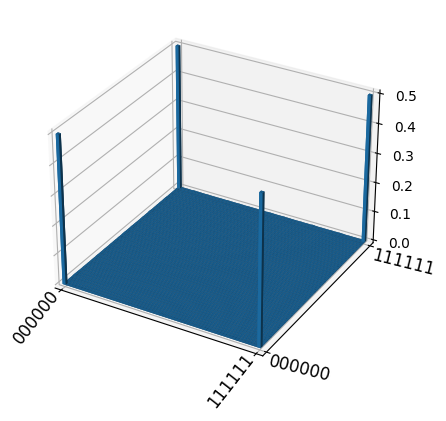

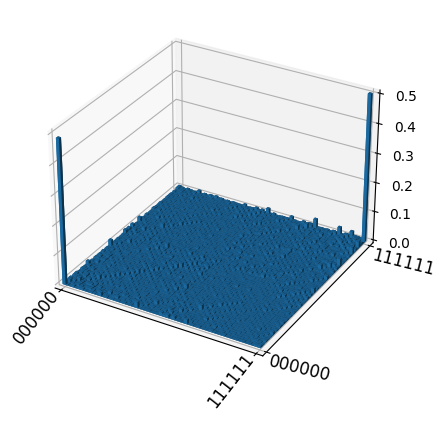

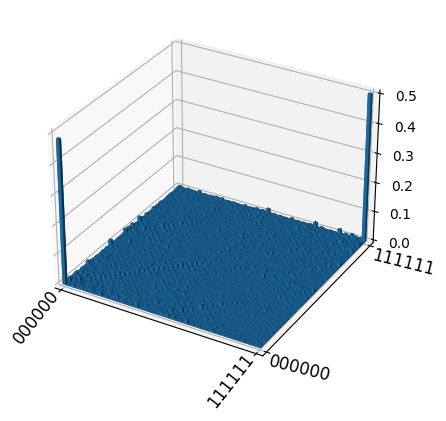

In [119]:
dms = [ideal_dm, linear_dm, linear_mle_dm, gaussian_mle_dm, model_pre_dm, model_post_dm]
for dm_type, dm in zip(dm_types+['model_pre', 'model_post'], dms):
    plotDM(dm, n_qubits)
    try:
        print(f'{dm_type} : Quantum fidelity = {state_fidelity(ideal_dm, dm)}')
    except QiskitError:
        print(f'{dm_type} : Quantum fidelity = {state_fidelity(ideal_dm, dm, validate=False)}')

In [89]:
# The above does not seem to work - check the training info
model_loss_path = f'{data_path}_{n_epochs}-{n_layers}-{d_model}-{n_heads}_loss.npy'
model_loss = np.load(model_loss_path)

The model_loss has two columns - column 0 containing training loss averaged over an epoch and column 1 containing validation loss over the test set

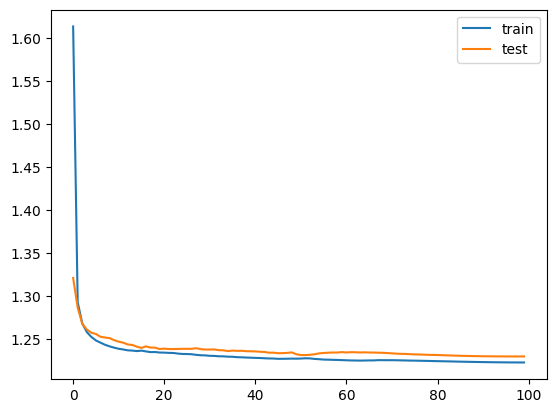

In [63]:
fig, ax = plt.subplots()
ax.plot(np.arange(model_loss.shape[1]), model_loss[0], label='train')
ax.plot(np.arange(model_loss.shape[1]), model_loss[1], label='test')
ax.set
ax.legend()